In [ ]:
 import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# LOADING THE DATASET

In [ ]:
df = pd.read_csv('energy_and_weather_dataset.csv')
df

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100.0,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100.0,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100.0,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100.0,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100.0,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57.0,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61.0,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61.0,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61.0,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


In [ ]:
df.isnull().sum()

,0
Time,0
Energy delta[Wh],0
GHI,227
temp,216
pressure,0
humidity,227
wind_speed,199
rain_1h,211
snow_1h,0
clouds_all,0


In [ ]:
df.shape

(196776, 17)

# PREPROCESSING

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Time,0
Energy delta[Wh],0
GHI,0
temp,0
pressure,0
humidity,0
wind_speed,0
rain_1h,0
snow_1h,0
clouds_all,0


In [ ]:
df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000,195701.000000
mean,573.286738,32.605464,9.792545,1015.291153,79.806138,3.938045,0.066018,0.007135,65.972126,0.520074,211.803976,748.661964,0.265285,3.198425,11.499067,6.298445
std,1045.149775,52.182263,7.995995,9.586610,15.606223,1.822064,0.278804,0.069665,36.630769,0.499598,273.948235,194.877548,0.329059,1.290088,6.921159,3.376046
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,6.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,578.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [ ]:
df.dtypes

,0
Time,object
Energy delta[Wh],int64
GHI,float64
temp,float64
pressure,int64
humidity,float64
wind_speed,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64


# EXPLORATORY DATA ANALYSIS

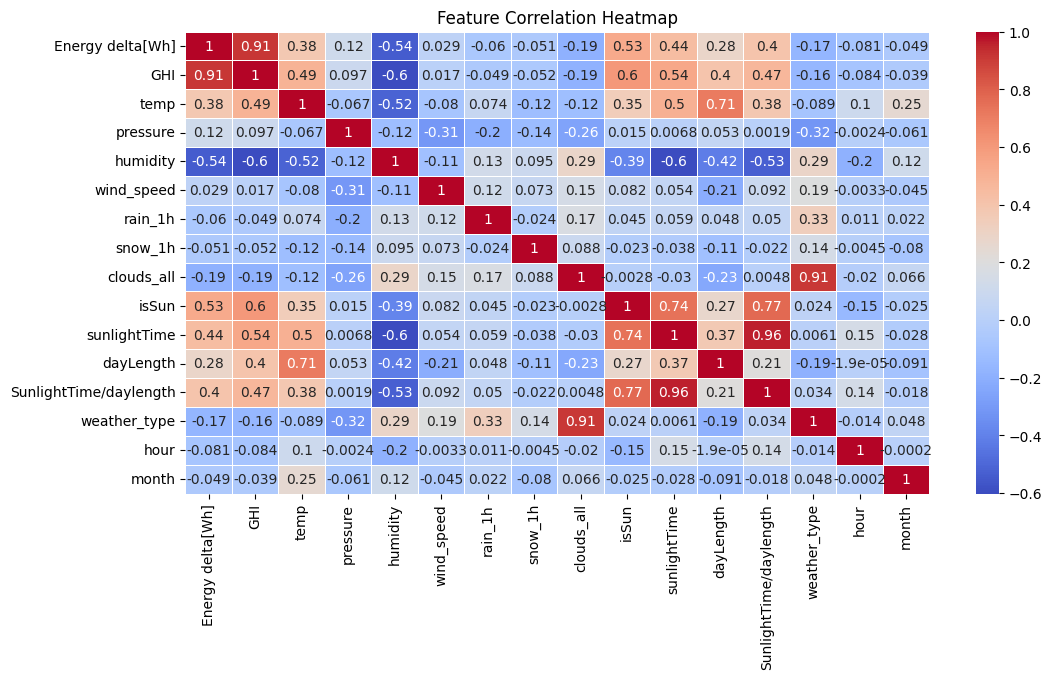

In [ ]:
# Compute correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()


# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Insights from the Correlation Heatmap:

Strongest Correlation with Energy Consumption (Energy delta[Wh]):
  - Global Horizontal Irradiance (GHI): 0.91 correlation, meaning sunlight exposure has a strong influence on energy usage.
  - IsSun (daytime indicator): 0.53 correlation, suggesting more energy consumption during the day.
  - Sunlight Time & Day Length: Moderate correlation, meaning solar energy availability impacts energy demand.

Weather Factors with Lower Correlation:
  - Temperature (temp): 0.38 correlation—warmer weather might slightly reduce energy usage (less heating).
  - Humidity: Negative correlation (-0.54), meaning humid conditions may reduce energy demand.
  - Wind Speed & Rainfall: Weak or negligible correlation.

## Key Takeaway:

  - Sunlight and GHI are the most influential factors on energy consumption.
  - Weather conditions like rain and wind speed have minimal impact.

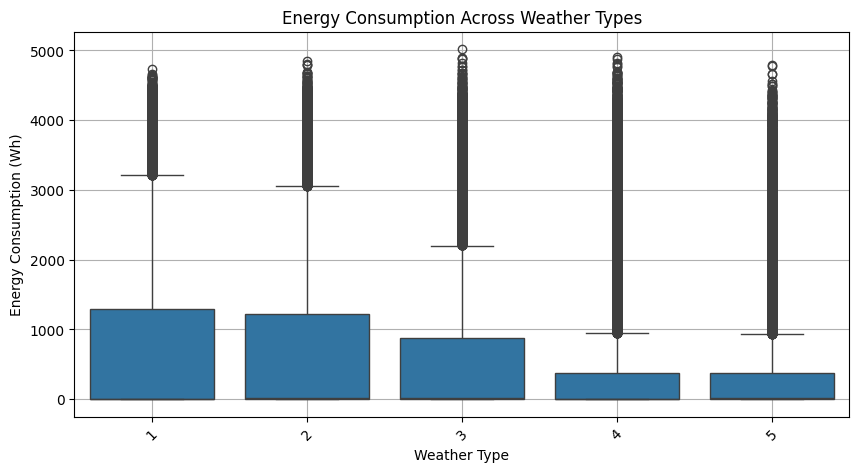

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='weather_type', y='Energy delta[Wh]', data=df)
plt.xlabel('Weather Type')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption Across Weather Types')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Insights from the Boxplot:

  - Higher Energy Consumption in Clear Weather: Weather types 1 and 2 show higher median energy consumption.
  - Lower Consumption in Cloudy/Rainy Weather: Weather types 4 and 5 show lower median consumption, likely due to reduced solar energy availability.
  - High Variability in All Weather Types: Outliers suggest energy spikes, possibly due to operational changes or weather anomalies.

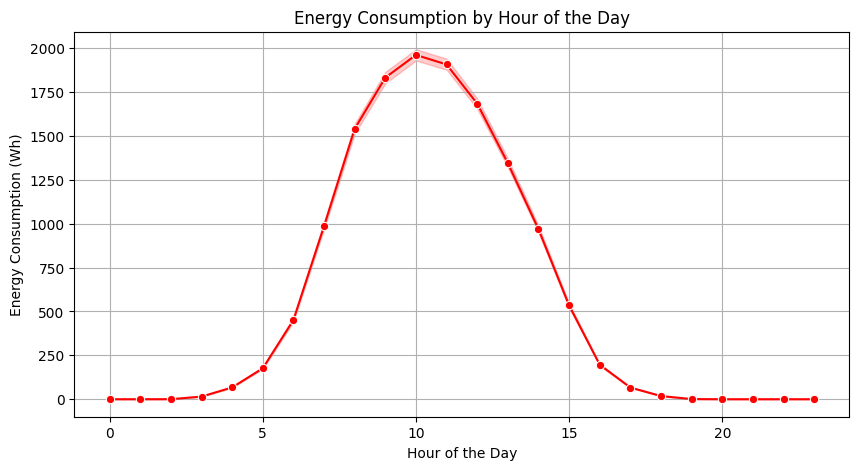

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='Energy delta[Wh]', data=df, marker='o', color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption by Hour of the Day')
plt.grid()
plt.show()

## Insights from the Visualization:
1. Peak Energy Consumption:

  - There is a sharp rise in energy usage starting from around 6 AM.
  - The highest energy consumption occurs around 10-11 AM.
  - After noon, energy consumption starts to decline gradually.
2. Low Consumption Hours:

  - Energy consumption is lowest during midnight to early morning (12 AM - 5 AM).
  - There is a sharp drop in energy usage after 3-4 PM.
3. Daily Pattern:

  - The pattern suggests morning peaks, likely due to increased appliance usage, heating, and industrial activities.
  - Evening consumption is lower, possibly indicating energy-saving habits or reliance on natural lighting in the evening.

<ipython-input-9-b9699b6d7a0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='Energy delta[Wh]', data=df, palette='coolwarm')


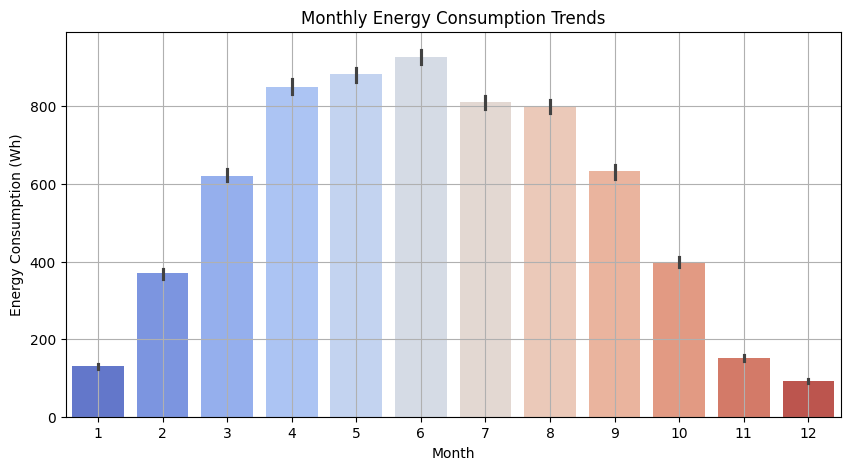

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='Energy delta[Wh]', data=df, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Monthly Energy Consumption Trends')
plt.grid()
plt.show()

## Insights from the Monthly Energy Consumption Trends:
Peak Consumption in Mid-Year (April–August):

1. Energy consumption is highest between April and August, possibly due to increased cooling demand in summer.
2. Lower Consumption in Winter (December–February):

The lowest energy consumption occurs in December and January, likely because of reduced cooling needs and potentially lower overall energy demand.
3. Gradual Increase from February to June:

There is a steady rise in energy usage from February to June, which could be due to increasing temperatures.
4. Decline After August:

After August, energy consumption gradually declines, likely as temperatures drop and cooling needs reduce.

##Key Takeaways:

  - Summer months may contribute to higher energy consumption due to air conditioning usage.
  - Energy demand in winter is significantly lower, indicating seasonal variations in energy consumption.
  - Understanding these patterns can help in energy forecasting and resource planning.






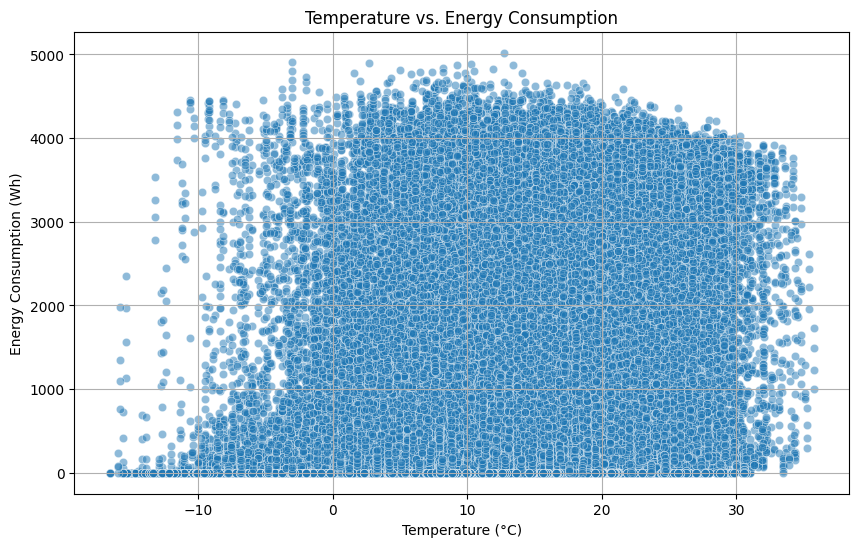

In [ ]:
# Scatter plot: Temperature vs. Energy Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temp'], y=df['Energy delta[Wh]'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Temperature vs. Energy Consumption')
plt.grid()
plt.show()

## Insights from Temperature vs. Energy Consumption:

1. No Strong Linear Relationship: Energy consumption is spread across all temperature ranges.

2. Slight U-Shaped Trend:
  - Higher energy usage in cold weather (below 0°C), likely due to heating needs.
  - Higher energy consumption in very hot weather (above 25°C), possibly due to air conditioning.

3. More Density in Moderate Temperatures (0°C to 20°C): Energy usage is relatively stable in this range.

# OUTLIER DETECTION


In [ ]:
df.dtypes

,0
Time,object
Energy delta[Wh],int64
GHI,float64
temp,float64
pressure,int64
humidity,float64
wind_speed,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64


<Figure size 1200x800 with 0 Axes>

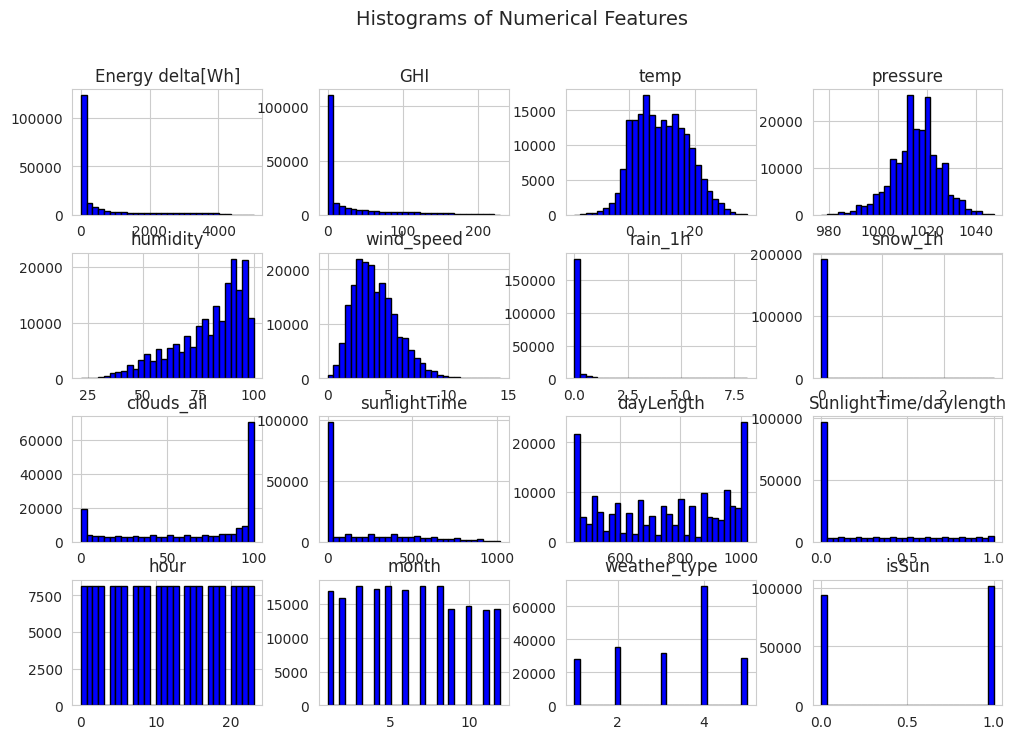

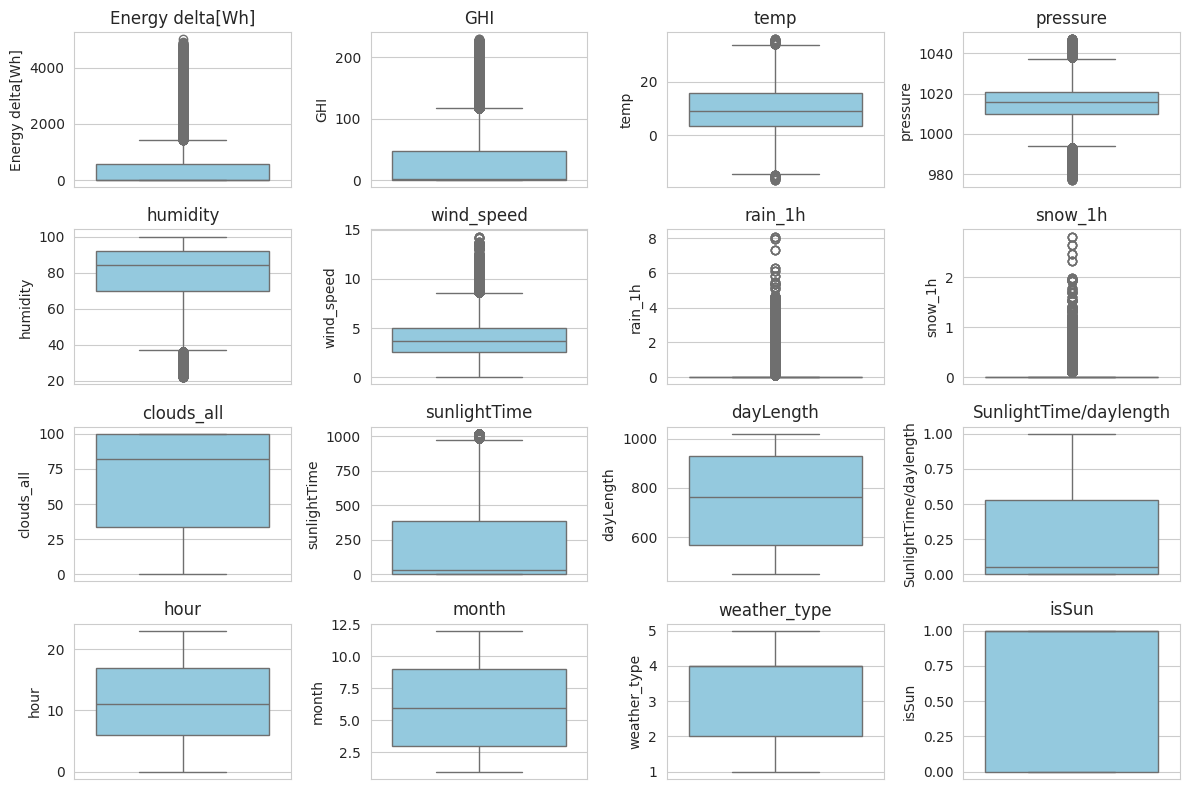

In [ ]:
numerical_columns = ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
                     'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all',
                     'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'hour', 'month','weather_type','isSun']

# Set plot style
sns.set_style("whitegrid")

# Plot histograms
plt.figure(figsize=(12, 8))
df[numerical_columns].hist(bins=30, figsize=(12, 8), color='blue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

# Plot box plots for outlier detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

# plt.suptitle("Box Plots for Outlier Detection", fontsize=14)
plt.show()

In [ ]:
print(df[['rain_1h','snow_1h','pressure', 'wind_speed', 'Energy delta[Wh]']].corr())

                   rain_1h   snow_1h  pressure  wind_speed  Energy delta[Wh]
rain_1h           1.000000 -0.024252 -0.201910    0.123707         -0.060016
snow_1h          -0.024252  1.000000 -0.135343    0.073047         -0.050838
pressure         -0.201910 -0.135343  1.000000   -0.314146          0.115386
wind_speed        0.123707  0.073047 -0.314146    1.000000          0.029118
Energy delta[Wh] -0.060016 -0.050838  0.115386    0.029118          1.000000


In [ ]:
#remove wind speed (low correlation)
df.drop(columns=['wind_speed','rain_1h','snow_1h'], inplace=True)

<ipython-input-4-1fee01037453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['wind_speed','rain_1h','snow_1h'], inplace=True)


<Figure size 1200x800 with 0 Axes>

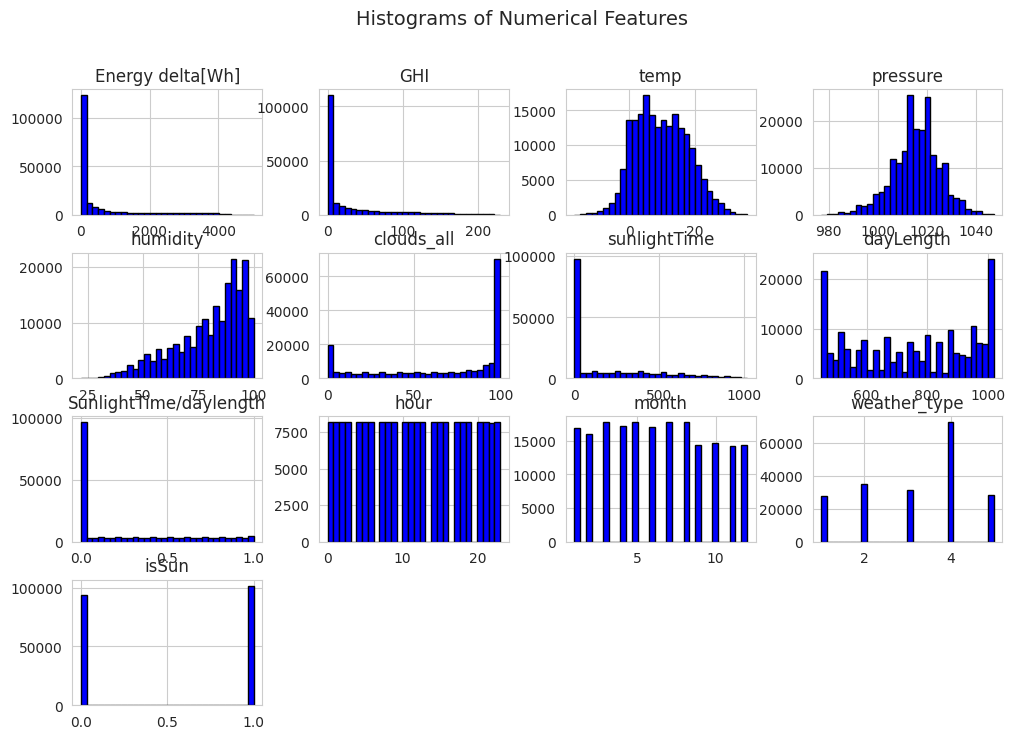

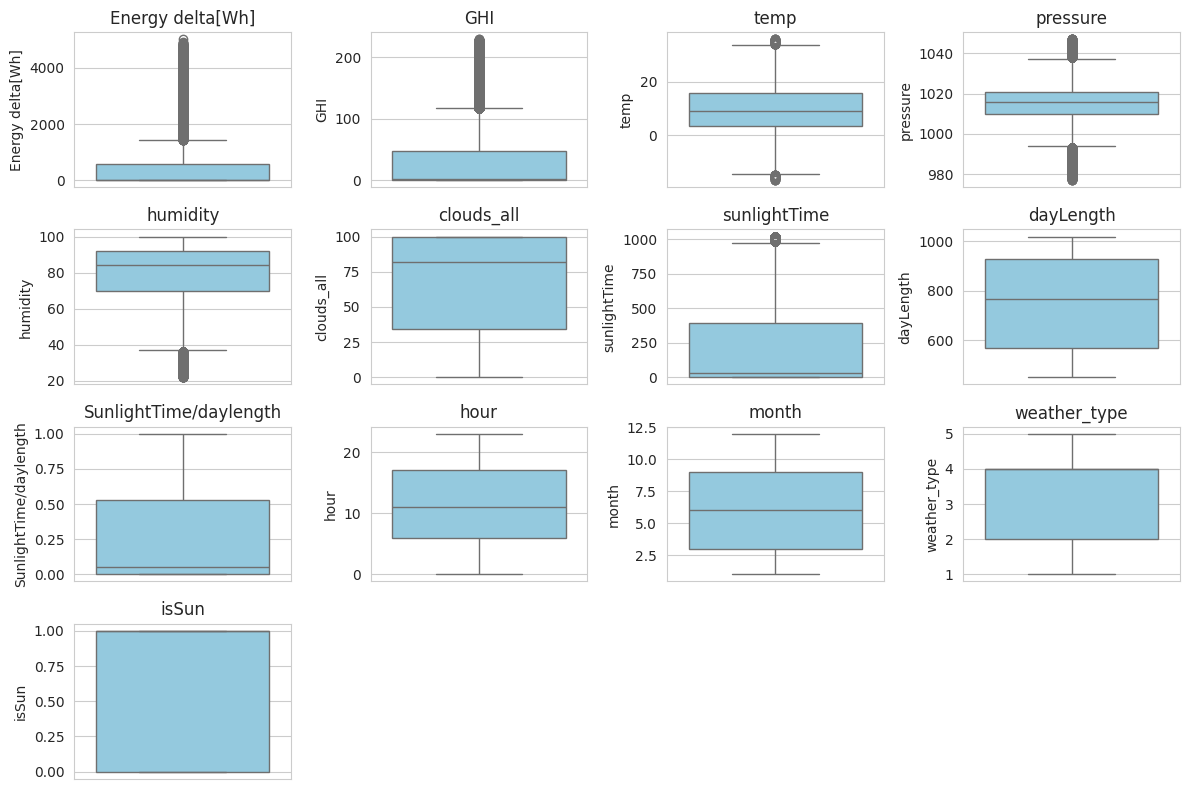

In [ ]:
numerical_columns = ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
                     'clouds_all',
                     'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'hour', 'month','weather_type','isSun']

# Set plot style
sns.set_style("whitegrid")

# Plot histograms
plt.figure(figsize=(12, 8))
df[numerical_columns].hist(bins=30, figsize=(12, 8), color='blue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

# Plot box plots for outlier detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

# plt.suptitle("Box Plots for Outlier Detection", fontsize=14)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195701 entries, 0 to 196775
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    195701 non-null  object 
 1   Energy delta[Wh]        195701 non-null  int64  
 2   GHI                     195701 non-null  float64
 3   temp                    195701 non-null  float64
 4   pressure                195701 non-null  int64  
 5   humidity                195701 non-null  float64
 6   clouds_all              195701 non-null  int64  
 7   isSun                   195701 non-null  int64  
 8   sunlightTime            195701 non-null  int64  
 9   dayLength               195701 non-null  int64  
 10  SunlightTime/daylength  195701 non-null  float64
 11  weather_type            195701 non-null  int64  
 12  hour                    195701 non-null  int64  
 13  month                   195701 non-null  int64  
dtypes: float64(4), int64(9), 

In [ ]:
df["Time"] = pd.to_datetime(df["Time"])


<ipython-input-5-69ab7afb8a46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time"] = pd.to_datetime(df["Time"])


In [ ]:
columns = df.columns
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Outliers in column '{col}':\n{outliers}\n")
    else:
        print(f"No outliers found in column '{col}'.\n")

No outliers found in column 'Time'.

Outliers in column 'Energy delta[Wh]':
144       1545
145       2115
427       2367
428       2572
429       2598
          ... 
196759    2757
196760    1562
196762    1826
196763    1729
196764    1654
Name: Energy delta[Wh], Length: 30680, dtype: int64

Outliers in column 'GHI':
5036      117.5
5415      118.8
5703      119.3
6186      120.2
6194      124.2
          ...  
196752    168.9
196753    152.4
196754    136.3
196755    131.2
196756    121.4
Name: GHI, Length: 20238, dtype: float64

Outliers in column 'temp':
40140    -14.7
40141    -14.7
40142    -14.7
40143    -14.7
40144    -15.0
          ... 
194179    34.3
194180    33.9
194181    33.9
194182    33.9
194183    33.9
Name: temp, Length: 139, dtype: float64

Outliers in column 'pressure':
304       993
305       993
306       993
307       993
308       992
         ... 
182879    993
182880    993
182881    993
182882    993
182883    993
Name: pressure, Length: 6364, dtype: int64



In [ ]:
import numpy as np

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows outside the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

outlier_cols = [ 'temp', 'pressure', 'humidity','sunlightTime']
df_cleaned = remove_outliers_iqr(df, outlier_cols)

In [ ]:
columns = df_cleaned.columns
for col in columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Outliers in column '{col}':\n{outliers}\n")
    else:
        print(f"No outliers found in column '{col}'.\n")

No outliers found in column 'Time'.

Outliers in column 'Energy delta[Wh]':
144       1545
145       2115
427       2367
428       2572
429       2598
          ... 
196759    2757
196760    1562
196762    1826
196763    1729
196764    1654
Name: Energy delta[Wh], Length: 28966, dtype: int64

Outliers in column 'GHI':
5415      118.8
5703      119.3
6186      120.2
6194      124.2
6195      127.5
          ...  
196752    168.9
196753    152.4
196754    136.3
196755    131.2
196756    121.4
Name: GHI, Length: 18718, dtype: float64

Outliers in column 'temp':
40340   -14.5
40341   -14.5
40342   -14.5
40343   -14.5
Name: temp, dtype: float64

No outliers found in column 'pressure'.

No outliers found in column 'humidity'.

No outliers found in column 'clouds_all'.

No outliers found in column 'isSun'.

No outliers found in column 'sunlightTime'.

No outliers found in column 'dayLength'.

No outliers found in column 'SunlightTime/daylength'.

No outliers found in column 'weather_type'.

N

In [ ]:
# Define columns to cap
columns_to_cap = ["Energy delta[Wh]", "GHI"]

# Capping at the 99th percentile
for col in columns_to_cap:
    upper_limit = df_cleaned[col].quantile(0.99)
    df_cleaned[col] = df_cleaned[col].clip(upper=upper_limit)

# Handling temperature column
# If -14.5°C is an error, remove those rows
df_cleaned = df_cleaned[df_cleaned["temp"] != -14.5]

In [ ]:
columns = df_cleaned.columns
for col in columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Outliers in column '{col}':\n{outliers}\n")
    else:
        print(f"No outliers found in column '{col}'.\n")

No outliers found in column 'Time'.

Outliers in column 'Energy delta[Wh]':
144       1545.0
145       2115.0
427       2367.0
428       2572.0
429       2598.0
           ...  
196759    2757.0
196760    1562.0
196762    1826.0
196763    1729.0
196764    1654.0
Name: Energy delta[Wh], Length: 28966, dtype: float64

Outliers in column 'GHI':
5415      118.8
5703      119.3
6186      120.2
6194      124.2
6195      127.5
          ...  
196752    168.9
196753    152.4
196754    136.3
196755    131.2
196756    121.4
Name: GHI, Length: 18718, dtype: float64

No outliers found in column 'temp'.

No outliers found in column 'pressure'.

No outliers found in column 'humidity'.

No outliers found in column 'clouds_all'.

No outliers found in column 'isSun'.

No outliers found in column 'sunlightTime'.

No outliers found in column 'dayLength'.

No outliers found in column 'SunlightTime/daylength'.

No outliers found in column 'weather_type'.

No outliers found in column 'hour'.

No outliers fo

In [ ]:

df_cleaned['Energy delta[Wh]'] = np.log1p(df_cleaned['Energy delta[Wh]'])  # log(1+x) to handle zeros
df_cleaned['GHI'] = np.log1p(df_cleaned['GHI'])



In [ ]:
columns = df_cleaned.columns
for col in columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Outliers in column '{col}':\n{outliers}\n")
    else:
        print(f"No outliers found in column '{col}'.\n")

No outliers found in column 'Time'.

No outliers found in column 'Energy delta[Wh]'.

No outliers found in column 'GHI'.

No outliers found in column 'temp'.

No outliers found in column 'pressure'.

No outliers found in column 'humidity'.

No outliers found in column 'clouds_all'.

No outliers found in column 'isSun'.

No outliers found in column 'sunlightTime'.

No outliers found in column 'dayLength'.

No outliers found in column 'SunlightTime/daylength'.

No outliers found in column 'weather_type'.

No outliers found in column 'hour'.

No outliers found in column 'month'.



In [ ]:
df_cleaned.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0.0,0.0,1.6,1021,100.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0.0,0.0,1.6,1021,100.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0.0,0.0,1.6,1021,100.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0.0,0.0,1.6,1021,100.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0.0,0.0,1.7,1020,100.0,100,0,0,450,0.0,4,1,1


In [ ]:
df_cleaned.isnull().sum()

,0
Time,0
Energy delta[Wh],0
GHI,0
temp,0
pressure,0
humidity,0
clouds_all,0
isSun,0
sunlightTime,0
dayLength,0


<Figure size 1200x800 with 0 Axes>

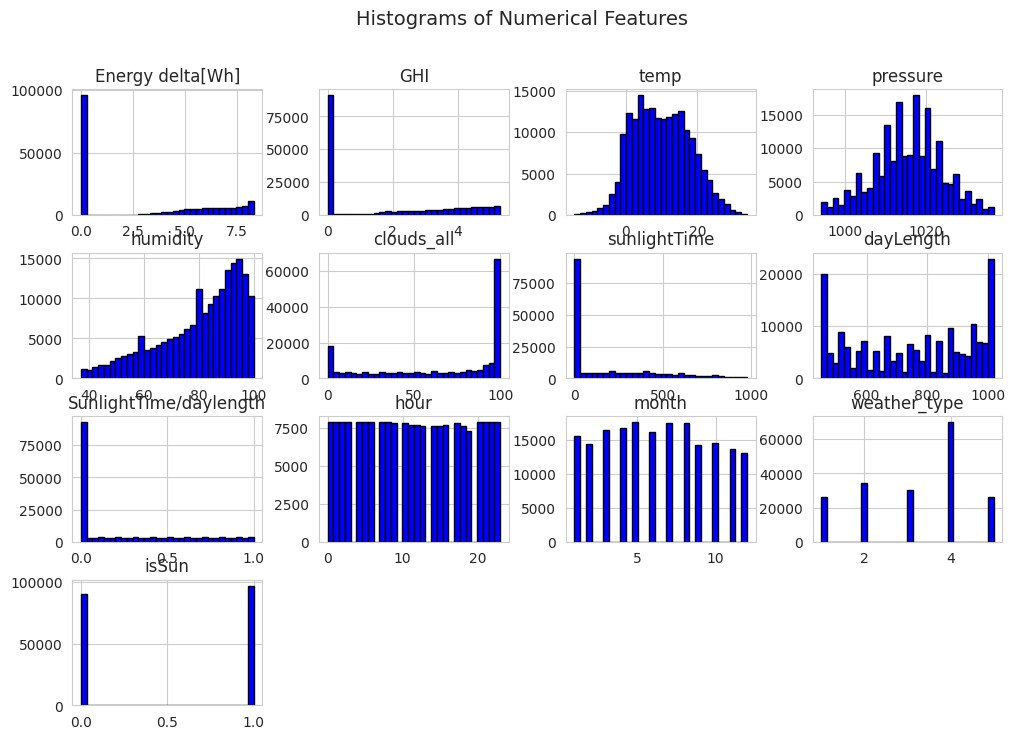

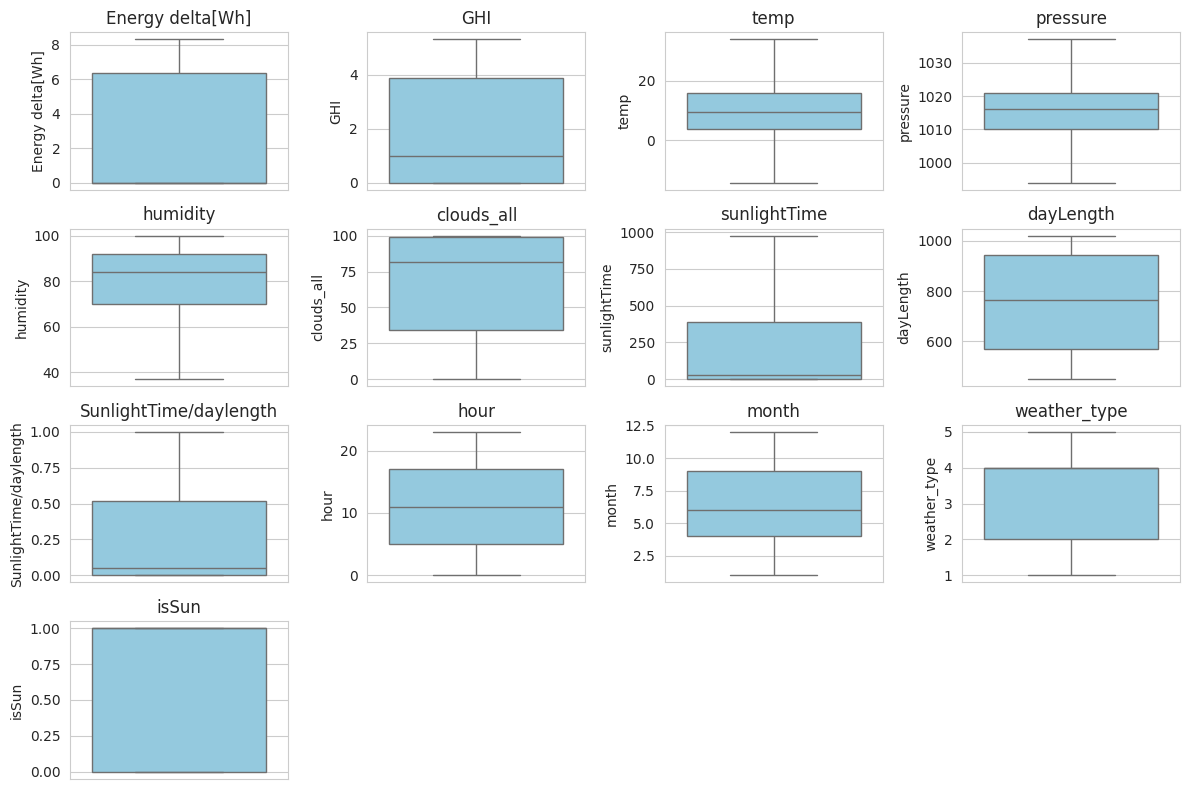

In [ ]:
numerical_columns = ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
                     'clouds_all',
                     'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'hour', 'month','weather_type','isSun']

# Set plot style
sns.set_style("whitegrid")

# Plot histograms
plt.figure(figsize=(12, 8))
df_cleaned[numerical_columns].hist(bins=30, figsize=(12, 8), color='blue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

# Plot box plots for outlier detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_cleaned[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

# plt.suptitle("Box Plots for Outlier Detection", fontsize=14)
plt.show()

# FEATURE ENGINEERING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

#  Ensure Time is in datetime format & sorted

df_cleaned = df_cleaned.sort_values(by='Time')     #

#  Create Time-Based Features
df_cleaned['day_of_week'] = df_cleaned['Time'].dt.dayofweek  # Monday=0, Sunday=6

#  Lag Features (Use past energy values for prediction)
df_cleaned['Energy_lag_1h'] = df_cleaned['Energy delta[Wh]'].shift(1)
df_cleaned['Energy_lag_24h'] = df_cleaned['Energy delta[Wh]'].shift(24)

#  Rolling Mean Features (Smoothing the trend)
df_cleaned['Energy_rolling_6h'] = df_cleaned['Energy delta[Wh]'].rolling(window=6).mean()
df_cleaned['Energy_rolling_24h'] = df_cleaned['Energy delta[Wh]'].rolling(window=24).mean()

#  Drop NaN values (from shifting & rolling)
df_cleaned.dropna(inplace=True)

#  Scaling Features (RobustScaler to handle outliers)
features = ['Energy_lag_1h', 'Energy_lag_24h', 'Energy_rolling_6h', 'Energy_rolling_24h',
            'GHI', 'temp', 'pressure', 'humidity', 'clouds_all', 'SunlightTime/daylength',
            'weather_type', 'hour', 'month', 'day_of_week']



print(df.head())


                 Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0 2017-01-01 00:00:00                 0  0.0   1.6      1021     100.0   
1 2017-01-01 00:15:00                 0  0.0   1.6      1021     100.0   
2 2017-01-01 00:30:00                 0  0.0   1.6      1021     100.0   
3 2017-01-01 00:45:00                 0  0.0   1.6      1021     100.0   
4 2017-01-01 01:00:00                 0  0.0   1.7      1020     100.0   

   clouds_all  isSun  sunlightTime  dayLength  SunlightTime/daylength  \
0         100      0             0        450                     0.0   
1         100      0             0        450                     0.0   
2         100      0             0        450                     0.0   
3         100      0             0        450                     0.0   
4         100      0             0        450                     0.0   

   weather_type  hour  month  
0             4     0      1  
1             4     0      1  
2             4     0  

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187130 entries, 24 to 196775
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Time                    187130 non-null  datetime64[ns]
 1   Energy delta[Wh]        187130 non-null  float64       
 2   GHI                     187130 non-null  float64       
 3   temp                    187130 non-null  float64       
 4   pressure                187130 non-null  int64         
 5   humidity                187130 non-null  float64       
 6   clouds_all              187130 non-null  int64         
 7   isSun                   187130 non-null  int64         
 8   sunlightTime            187130 non-null  int64         
 9   dayLength               187130 non-null  int64         
 10  SunlightTime/daylength  187130 non-null  float64       
 11  weather_type            187130 non-null  int64         
 12  hour                    187130 non

# FEATURE SELECTION

In [ ]:
# Define target column explicitly
target = "Energy delta[Wh]"  # Ensure this is the correct column name

# Compute absolute correlation with the target variable
correlation = df_cleaned[features + [target]].corr()[target].abs().sort_values(ascending=False)

# Select the top 5 most correlated features (excluding the target itself)
top_features = correlation.iloc[1:6].index.tolist()  # Exclude target column
print("Top 5 selected features:", top_features)

# Use only the selected top 5 features
X_selected = df_cleaned[top_features]


Top 5 selected features: ['Energy_lag_1h', 'GHI', 'Energy_rolling_6h', 'SunlightTime/daylength', 'Energy_rolling_24h']


In [ ]:
# Compute correlation matrix
correlation_matrix = df_cleaned[features + ['Energy delta[Wh]']].corr()

# Compute absolute correlation with the target variable
correlation = correlation_matrix['Energy delta[Wh]'].abs().sort_values(ascending=False)

# Display the correlation values
print("Feature Correlation with Energy Consumption:\n", correlation)


Feature Correlation with Energy Consumption:
 Energy delta[Wh]          1.000000
Energy_lag_1h             0.982612
GHI                       0.966133
Energy_rolling_6h         0.962275
SunlightTime/daylength    0.704455
Energy_rolling_24h        0.686632
humidity                  0.499278
temp                      0.407325
hour                      0.129076
clouds_all                0.063715
Energy_lag_24h            0.040072
pressure                  0.039340
month                     0.035752
weather_type              0.033917
day_of_week               0.001359
Name: Energy delta[Wh], dtype: float64


In [ ]:
# Define target column explicitly
target = "Energy delta[Wh]"  # Ensure this is the correct column name

# Compute absolute correlation with the target variable
correlation = df_cleaned[features + [target]].corr()[target].abs().sort_values(ascending=False)

# Select the top 7 most correlated features (excluding the target itself)
top_features = correlation.iloc[1:8].index.tolist()  # Exclude target column
print("Top 7 selected features:", top_features)

# Use only the selected top 7 features
X_selected = df_cleaned[top_features]



Top 7 selected features: ['Energy_lag_1h', 'GHI', 'Energy_rolling_6h', 'SunlightTime/daylength', 'Energy_rolling_24h', 'humidity', 'temp']


In [ ]:
# Define the top 7 features
top_features = ['Energy_lag_1h', 'GHI', 'Energy_rolling_6h', 'SunlightTime/daylength', 'Energy_rolling_24h', 'humidity', 'temp']

# Drop 'Energy_rolling_24h'
top_features.remove('Energy_rolling_24h')

# Assign the remaining top 6 features to a variable
X_selected = df_cleaned[top_features]

print("Final selected features:", top_features)


Final selected features: ['Energy_lag_1h', 'GHI', 'Energy_rolling_6h', 'SunlightTime/daylength', 'humidity', 'temp']


# MODEL TRAINING

In [ ]:
X = X_selected
y = df_cleaned['Energy delta[Wh]']


# Split Data (Recent Data for Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
print("Feature order in X_selected:")
print(list(X_selected.columns))


Feature order in X_selected:
['Energy_lag_1h', 'GHI', 'Energy_rolling_6h', 'SunlightTime/daylength', 'humidity', 'temp']


In [ ]:
models = {
    "XGBoost": XGBRegressor(n_estimators=80, learning_rate=0.05, max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),
    "Linear Regression": LinearRegression()
}


In [ ]:
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Cross-validation (5-fold)
    cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=5)
    cv_mae = -np.mean(cv_scores)  # Convert negative score to positive

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Performance Metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        "CV MAE": cv_mae,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train R²": train_r2,
        "Test R²": test_r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                     CV MAE  Train MAE  Test MAE  Train R²   Test R²
XGBoost            0.161201   0.158497  0.162957  0.989844  0.989655
Random Forest      0.163648   0.162599  0.169991  0.986319  0.986081
Linear Regression  0.245852   0.245146  0.253701  0.975450  0.974922


#HYPERTUNING THE BEST MODEL(XGBoost)

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.01, 10.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.01, 10.0, log=True),
    }

    model = XGBRegressor(**params, random_state=42)

    # Perform cross-validation and minimize mean absolute error
    cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=5)
    return -cv_scores.mean()  # Convert negative score to positive

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train with best parameters
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Optimized XGBoost - MAE: {mae:.3f}, R²: {r2:.3f}")




[I 2025-03-26 15:33:05,400] A new study created in memory with name: no-name-ca0d8b7a-a69c-4cee-af0b-7b05227bf7a3
[I 2025-03-26 15:33:51,596] Trial 0 finished with value: 0.12700510721048155 and parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.07885241624344615, 'subsample': 0.6946171496632219, 'colsample_bytree': 0.7419455398022528, 'reg_lambda': 0.2475327020276804, 'reg_alpha': 0.027930067882266027}. Best is trial 0 with value: 0.12700510721048155.
[I 2025-03-26 15:33:55,702] Trial 1 finished with value: 0.5587361823370984 and parameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01839309545583338, 'subsample': 0.8383689686366913, 'colsample_bytree': 0.651309324043145, 'reg_lambda': 0.11070553510159124, 'reg_alpha': 2.8662966307594564}. Best is trial 0 with value: 0.12700510721048155.
[I 2025-03-26 15:34:10,665] Trial 2 finished with value: 0.2956255953918447 and parameters: {'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.0105233860827348

Best Parameters: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05392469412868597, 'subsample': 0.9134081563420804, 'colsample_bytree': 0.8504498445295475, 'reg_lambda': 0.07905403530411251, 'reg_alpha': 0.4643222359365029}
Optimized XGBoost - MAE: 0.128, R²: 0.990


In [ ]:
 !pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 17.5 MB/s eta 0:00:00


In [ ]:
# Train with best parameters
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Optimized XGBoost - MAE: {mae:.3f}, R²: {r2:.3f}")



Optimized XGBoost - MAE: 0.127, R²: 0.990


#TESTING FOR OVERFITTING AND UNDERFITTING


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on training and test sets
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Calculate MAE and R² for both training and test sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training MAE: {train_mae:.3f}, Test MAE: {test_mae:.3f}")
print(f"Training R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")

# Check for Overfitting
if train_mae < test_mae * 0.8 and train_r2 > test_r2 + 0.05:
    print(" Warning: Model is overfitting!")
else:
    print(" Model generalizes well.")


Training MAE: 0.096, Test MAE: 0.128
Training R²: 0.996, Test R²: 0.990
 Model generalizes well.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test Metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MAE: {train_mae:.3f}, Test MAE: {test_mae:.3f}")
print(f"Train RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}")
print(f"Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")


Train MAE: 0.096, Test MAE: 0.128
Train RMSE: 0.209, Test RMSE: 0.330
Train R²: 0.996, Test R²: 0.990


In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(comparison_df.head(10))  # Show first 10 values


          Actual  Predicted
157305  6.755769   6.861609
157306  7.195187   7.000786
157307  7.118826   7.138794
157308  6.976348   6.954656
157309  6.927558   6.756698
157310  6.673298   6.721224
157311  6.293419   6.577482
157312  6.023448   6.261121
157313  6.035481   5.989061
157314  6.040255   5.888598


In [ ]:
print(y_train.describe())  # Check the range of original target values


count    149704.000000
mean          3.030900
std           3.301305
min           0.000000
25%           0.000000
50%           0.000000
75%           6.349139
max           8.300139
Name: Energy delta[Wh], dtype: float64


In [ ]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)})
df_predictions['Predicted Energy delta[Wh]'] = np.expm1(df_predictions['Predicted'])  # Reverse log transformation

# Display the first few rows
print(df_predictions.head())




          Actual  Predicted  Predicted Energy delta[Wh]
157305  6.755769   6.670688                  787.938060
157306  7.195187   6.848506                  941.471708
157307  7.118826   7.090591                 1199.617616
157308  6.976348   6.952181                 1044.427122
157309  6.927558   6.765954                  866.793333


In [ ]:
df_predictions['Recovered Actual'] = np.expm1(df_predictions['Actual'])

# Compare recovered actual values with the original actual values
print(df_predictions[['Recovered Actual', 'Predicted Energy delta[Wh]']].head())


        Recovered Actual  Predicted Energy delta[Wh]
157305             858.0                  787.938060
157306            1332.0                  941.471708
157307            1234.0                 1199.617616
157308            1070.0                 1044.427122
157309            1019.0                  866.793333


In [ ]:
df_predictions['Recovered Actual'] = np.expm1(df_predictions['Actual'])

# Compare recovered actual values with the original actual values
print(df_predictions[['Recovered Actual', 'Predicted Energy delta[Wh]']].tail())

        Recovered Actual  Predicted Energy delta[Wh]
196771             118.0                  114.979632
196772              82.0                   76.362347
196773              51.0                   41.449452
196774              24.0                   15.913317
196775               0.0                    7.656254


#VISUALIZATIONS FOR OVERFITTING AND UNDERFITTING

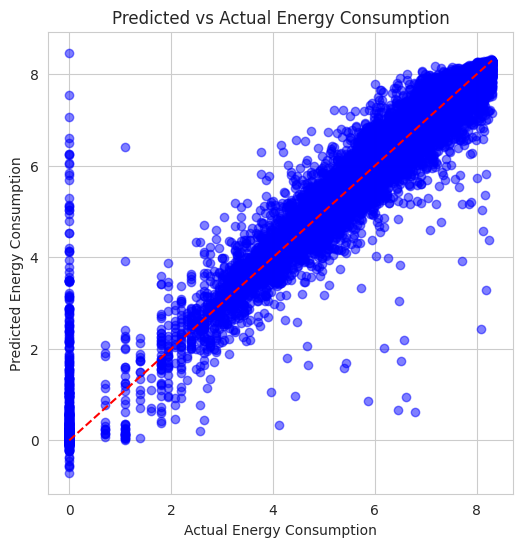

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="red")  # Ideal predictions line
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predicted vs Actual Energy Consumption")
plt.show()


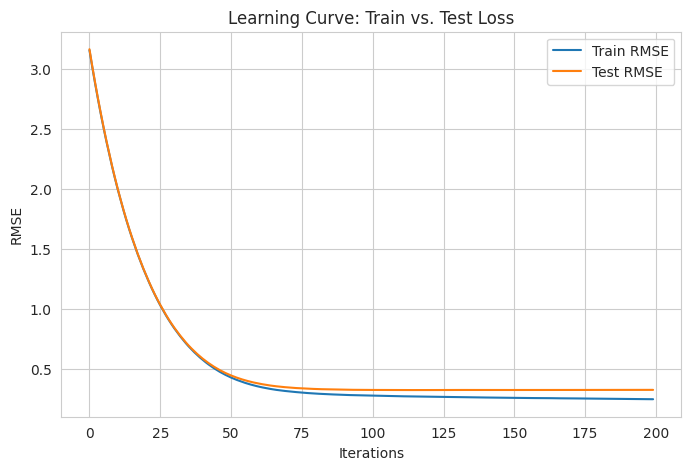

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

results = model.evals_result()  # Get training history

plt.figure(figsize=(8, 5))
plt.plot(results['validation_0']['rmse'], label="Train RMSE")
plt.plot(results['validation_1']['rmse'], label="Test RMSE")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("Learning Curve: Train vs. Test Loss")
plt.legend()
plt.show()


In [ ]:
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True  # Show evaluation results
)

[0]	validation_0-rmse:3.15322	validation_1-rmse:3.16096
[1]	validation_0-rmse:3.01110	validation_1-rmse:3.01840
[2]	validation_0-rmse:2.87534	validation_1-rmse:2.88216
[3]	validation_0-rmse:2.74606	validation_1-rmse:2.75253
[4]	validation_0-rmse:2.62253	validation_1-rmse:2.62861
[5]	validation_0-rmse:2.50475	validation_1-rmse:2.51043
[6]	validation_0-rmse:2.39244	validation_1-rmse:2.39780
[7]	validation_0-rmse:2.28615	validation_1-rmse:2.29108
[8]	validation_0-rmse:2.18388	validation_1-rmse:2.18854
[9]	validation_0-rmse:2.08660	validation_1-rmse:2.09114
[10]	validation_0-rmse:1.99387	validation_1-rmse:1.99820
[11]	validation_0-rmse:1.90614	validation_1-rmse:1.90997
[12]	validation_0-rmse:1.82189	validation_1-rmse:1.82564
[13]	validation_0-rmse:1.74138	validation_1-rmse:1.74513
[14]	validation_0-rmse:1.66543	validation_1-rmse:1.66894
[15]	validation_0-rmse:1.59314	validation_1-rmse:1.59650
[16]	validation_0-rmse:1.52430	validation_1-rmse:1.52740
[17]	validation_0-rmse:1.45785	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8553746289287206, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.04570564238936459, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Retrieve evaluation results
results = model.evals_result()  # Stores training metrics

# Print available metrics
print(results.keys())

dict_keys(['validation_0', 'validation_1'])


#SAVE THE MODEL

In [ ]:
import pickle

# Save the trained XGBoost model
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

print("Model saved as xgboost_model.pkl")


Model saved as xgboost_model.pkl


#LOADING AND PREDICTION USING THE MODEL

In [ ]:
import numpy as np
import pickle

# Load the trained XGBoost model
with open("xgboost_model.pkl", "rb") as f:
    model = pickle.load(f)

# Try loading the scaler if used during training
try:
    with open("scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    use_scaler = True
    print("Scaler loaded successfully.")
except FileNotFoundError:
    use_scaler = False
    print("No scaler found. Proceeding without scaling.")

# Input features based on your dataset
X_test_sample = np.array([[300, 700, 34, 11, 56, 45]])  # Replace with real values

# Apply log transformation to GHI (Solar Radiation) at index 1
X_test_sample[:, 1] = np.log1p(X_test_sample[:, 1])  # log(1 + Solar Radiation)

# Apply scaling if a scaler was used
if use_scaler:
    X_test_sample = scaler.transform(X_test_sample)

# Make the prediction
y_pred_log = model.predict(X_test_sample)

# Reverse log transformation to get actual energy consumption
y_pred_actual = np.expm1(y_pred_log)  # Inverse of log1p: exp(y) - 1

print("Predicted Energy Consumption (Actual):", y_pred_actual[0])



No scaler found. Proceeding without scaling.
Predicted Energy Consumption (Actual): 1063.0977
